IMPORTING ALL THE REQUIRED LIBRARIES

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df_train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/loan_prediction/train_ctrUa4K.csv")
df_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/loan_prediction/test_lAUu6dG.csv")

In [0]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
df_train.shape

(614, 13)

In [0]:
df_train.drop(df_train[df_train['CoapplicantIncome']>10000].index, inplace= True)
df_train.drop(df_train[df_train['ApplicantIncome']>20000].index, inplace= True)
df_train.drop(df_train[df_train['LoanAmount']>550].index, inplace= True)

In [0]:
y_train = df_train['Loan_Status']

MERGING THE TEST AND TRAIN DATASET 

In [0]:
frames = [df_train,df_test]
df = pd.concat(frames, keys=['x', 'y'])

df

Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
x 0    LP001002   Male      No  ...            1.0         Urban           Y
  1    LP001003   Male     Yes  ...            1.0         Rural           N
  2    LP001005   Male     Yes  ...            1.0         Urban           Y
  3    LP001006   Male     Yes  ...            1.0         Urban           Y
  4    LP001008   Male      No  ...            1.0         Urban           Y
...         ...    ...     ...  ...            ...           ...         ...
y 362  LP002971   Male     Yes  ...            1.0         Urban         NaN
  363  LP002975   Male     Yes  ...            1.0         Urban         NaN
  364  LP002980   Male      No  ...            NaN     Semiurban         NaN
  365  LP002986   Male     Yes  ...            1.0         Rural         NaN
  366  LP002989   Male      No  ...            1.0         Rural         NaN

[961 rows x 13 columns]

CHECKING FOR MISSING DATA AND FILLING THE VALUES

In [1]:
missing values = df.isnul().sum().sort_values(ascending = False)
missing values

NameError: ignored

In [0]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)

df['Dependents'].replace(to_replace = '3+', value = 3, inplace = True)
df['Dependents'].fillna(df['Dependents'].median(), inplace = True)
df['Dependents'] = df['Dependents'].astype(int)

for column in ['Credit_History', 'Self_Employed', 'Gender', 'Married']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [0]:
df['total_amount'] = df['ApplicantIncome'] +df['CoapplicantIncome']
df['ratio']= df['total_amount']/df['LoanAmount']

In [0]:
df.drop('Loan_ID', axis = 1, inplace = True)
df.drop('ApplicantIncome', axis = 1, inplace = True)
df.drop('CoapplicantIncome', axis = 1, inplace = True)

VISUALIZATIONS

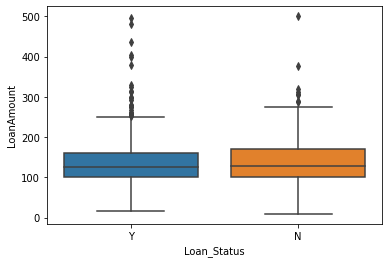

In [0]:
sns.boxplot('Loan_Status','LoanAmount', data = df_train)

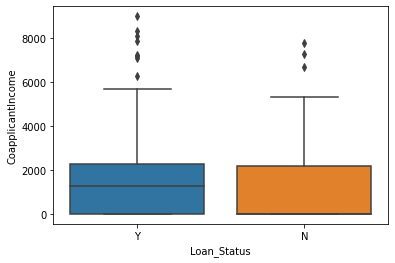

In [0]:
sns.boxplot('Loan_Status','CoapplicantIncome', data = df_train)

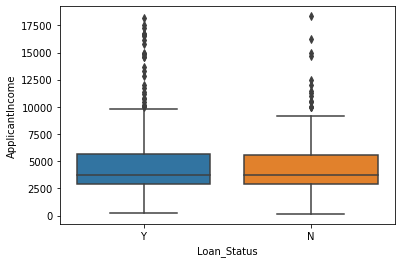

In [0]:
sns.boxplot('Loan_Status','ApplicantIncome', data = df_train)

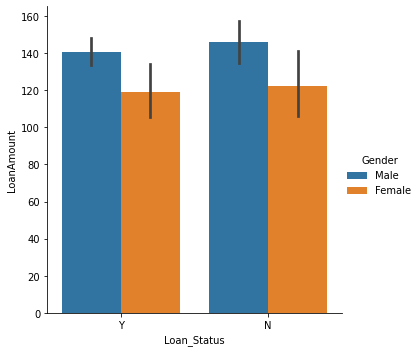

In [0]:
sns.catplot(x="Loan_Status", y="LoanAmount", hue="Gender", kind="bar", data=df_train);

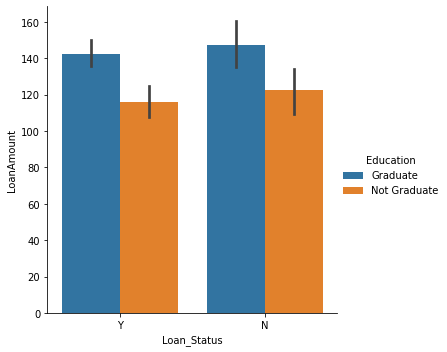

In [0]:
sns.catplot(x="Loan_Status", y="LoanAmount", hue="Education", kind= "bar" , data=df_train);

CHECKING THE SKEWNESS OF THE DATA

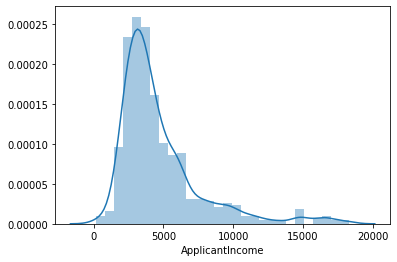

In [0]:
sns.distplot(df_train['ApplicantIncome'])

In [0]:
df.describe()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,total_amount,ratio
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,0.758585,137.431016,342.333688,0.849116,6224.732487,48.857439
std,1.022656,63.188123,64.259396,0.358123,4038.914178,32.353857
min,0.000000,9.000000,6.000000,0.000000,1442.000000,9.777778
25%,0.000000,100.000000,360.000000,1.000000,4136.000000,35.063291
50%,0.000000,128.000000,360.000000,1.000000,5251.000000,41.200000
75%,2.000000,160.000000,360.000000,1.000000,7100.000000,50.903226
max,3.000000,550.000000,480.000000,1.000000,72529.000000,525.000000


In [0]:
df.skew(axis=0).sort_values(ascending= False)

ratio               6.298247
total_amount        6.172225
LoanAmount          1.977789
Dependents          0.994200
Credit_History     -1.953764
Loan_Amount_Term   -2.542098
dtype: float64

In [0]:
num_feats = df.select_dtypes(exclude = ['object']).columns
num_feats = num_feats.drop("Credit_History")
df[num_feats] = np.log1p(df[num_feats])

In [0]:
df.head()

Gender Married  Dependents  ... Loan_Status total_amount     ratio
x 0   Male      No    0.000000  ...           Y     8.674197  3.774129
  1   Male     Yes    0.693147  ...           N     8.714732  3.883334
  2   Male     Yes    0.000000  ...           Y     8.006701  3.838474
  3   Male     Yes    0.000000  ...           Y     8.505525  3.741828
  4   Male      No    0.000000  ...           Y     8.699681  3.773983

[5 rows x 12 columns]

In [0]:
df.skew(axis=0).sort_values(ascending= False)

ratio               1.421711
total_amount        0.674816
Dependents          0.657699
LoanAmount         -0.495020
Credit_History     -1.953764
Loan_Amount_Term   -5.621204
dtype: float64

CONVERTING CATEGORICAL COLUMNS TO NUMERICAL ONES

In [0]:
df1 = pd.get_dummies(df, columns=list(df.select_dtypes(exclude=np.number)))
df1.head()

Dependents  LoanAmount  ...  Loan_Status_N  Loan_Status_Y
x 0    0.000000    4.930372  ...              0              1
  1    0.693147    4.859812  ...              1              0
  2    0.000000    4.204693  ...              0              1
  3    0.000000    4.795791  ...              0              1
  4    0.000000    4.955827  ...              0              1

[5 rows x 19 columns]

In [0]:
col= ['Loan_Status_N','Loan_Status_Y']
df1.drop(columns = col,axis = 1,inplace = True)

In [0]:
#from sklearn.preprocessing import LabelEncoder
#lb_make = LabelEncoder()
#columns = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area']
#for col in columns:
 # df[col] = lb_make.fit_transform(df[col])

In [0]:
#df1.drop(['Gender_Male', 'Married_No','Education_Not Graduate','Self_Employed_No','Loan_Status_N'], axis=1, inplace=True)

SPLITTING THE DATA BACK TO TRAIN AND TEST

In [0]:
df_train = df1.xs('x')
df_test = df1.xs('y')

In [0]:
df_train.shape

(594, 17)

In [0]:
#df_train['Loan_Status'] = lb_make.fit_transform(df_train['Loan_Status'])

In [0]:
X_train = df_train.iloc[:,0:17]
X_test = df_test.iloc[:,0:17]

In [0]:
X_train.shape

(594, 17)

LOGISTIC REGRESSION MODEL

In [0]:
lr = LogisticRegression(C = 10)
lr_model = lr.fit(X_train, y_train)

scores_lr = cross_val_score(lr_model, X_train, y_train, cv = 5)
scores_lr.mean()

0.8182025352513886

In [0]:
xgb = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=1)
xgb_model = xgb.fit(X_train,y_train)

scores_xgb = cross_val_score(xgb_model,X_train,y_train,cv=5)

scores_xgb.mean()

0.8198689645349667

DECISION TREE



In [0]:
dtree = tree.DecisionTreeClassifier(max_depth=2)
dtree_model = dtree.fit(X_train,y_train)

scores_dtree = cross_val_score(dtree_model, X_train, y_train, cv=5)
scores_dtree.mean()

0.821549636803874

RANDOM FOREST

In [0]:
rf = RandomForestClassifier(n_estimators = 10,max_depth = 2, max_features=13)
rf_model = rf.fit(X_train,y_train)

scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
scores_rf.mean()

0.8148269477282438

In [0]:
blendedclassifier = VotingClassifier(estimators=[('xgb',xgb_model), ('dt', dtree_model),('lr',lr_model)], voting = 'hard')
blendedclassifier_model = blendedclassifier.fit(X_train,y_train)

scores_blendedclassifier = cross_val_score(blendedclassifier_model, X_train, y_train, cv=5)
scores_blendedclassifier.mean()

0.8215496368038743

GETTING THE SUBMISSION FILE

In [0]:
sample = pd.read_csv('/content/drive/My Drive/Colab Notebooks/loan_prediction/sample_submission_49d68Cx.csv')
sample.iloc[:,1] = pd.Series(dtree_model.predict(X_test))

In [0]:
sample.to_csv('loan_pred_submission_j.csv', index = False)

In [0]:
sample

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [0]:
sample.isnull().sum()

Loan_ID        0
Loan_Status    0
dtype: int64